In [12]:
import musicdb
import matplotlib.pyplot as plt

db = musicdb.MusicDB()

Database musicdb has already been existed.
Table echonest has already been existed.
Table millionsonglink has already been existed.
Table spotify has already been existed.
Table songs has already been existed.


[57, 141, 286, 449, 697, 868, 933, 862, 800, 694, 671, 584, 540, 481, 419, 420, 378, 363, 312, 278, 243, 231, 216, 205, 213, 186, 187, 164, 150, 163, 142, 130, 129, 123, 89, 116, 92, 106, 106, 92, 93, 82, 90, 78, 94, 82, 76, 78, 64, 58, 48, 71, 52, 65, 73, 54, 40, 41, 49, 38, 49, 47, 34, 48, 30, 41, 39, 29, 32, 22, 33, 33, 30, 26, 26, 19, 33, 27, 24, 25, 27, 27, 18, 24, 20, 32, 23, 22, 17, 28, 15, 12, 19, 19, 14, 25, 14, 12, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


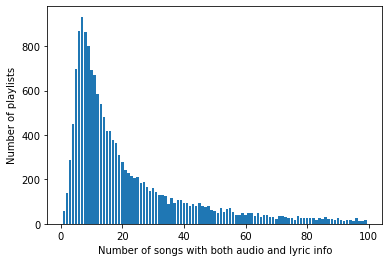

In [17]:
def visualize_echo_nest():
    sql_cmd_base = "SELECT COUNT(*) FROM {} WHERE ".format(db.echo_nest_table_name)
    query_cmd = "audio_lyric>={} and audio_lyric<{}"
    count = None
    pos = 1
    count_list = []
    pos_list = []
    while count is None or pos < 100:
        sql_cmd = sql_cmd_base + query_cmd.format(pos, pos + 1)
        my_cursor = db.execute_cmd(sql_cmd)
        for row in my_cursor:
            count = row[0]
            break
        count_list.append(count)
        pos_list.append(pos)
        pos += 1
        
    #print(count_list)
    #print(pos_list)
    
    # Plot
    plt.bar(pos_list, count_list)
    plt.xlabel('Number of songs with both audio and lyric info')
    plt.ylabel('Number of playlists')
    plt.show()
        
visualize_echo_nest()

In [24]:
# Get a counter by setting a threshold
def echo_nest_counter(thres):
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE audio_lyric>{}".format(db.echo_nest_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    count = 0
    for row in my_cursor:
        count = row[0]
        break
    count_all = 0
    sql_cmd = "SELECT COUNT(*) FROM {}".format(db.echo_nest_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        count_all = row[0]
        break
    print("There are {} ({} %) playlists with over {} audio and lyric".format(count, float(count/count_all)*100, thres))
    
echo_nest_counter(10)
echo_nest_counter(15)
echo_nest_counter(20)

There are 10474 (64.36823992133726 %) playlists with over 10 audio and lyric
There are 7779 (47.80604719764012 %) playlists with over 15 audio and lyric
There are 6028 (37.045231071779746 %) playlists with over 20 audio and lyric


[8, 6, 3, 2, 6, 15, 17, 27, 24, 59, 44, 31, 43, 55, 86, 102, 101, 151, 147, 168, 170, 174, 228, 229, 147, 225, 228, 229, 261, 267, 265, 262, 258, 302, 381, 380, 357, 392, 375, 460, 488, 533, 611, 733, 868, 965, 1109, 1256, 1210, 1461, 1667, 1949, 1993, 2529, 2539, 3281, 3799, 4220, 3992, 4325, 2701, 1502, 1530, 1647, 1743, 2214, 2389, 2612, 2416, 2822, 3645, 5159, 4261]
[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


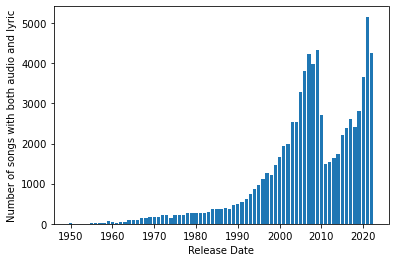

In [22]:
# visualize song table
def visualize_song_table():
    sql_cmd_base = "SELECT COUNT(*) FROM {} WHERE ".format(db.song_table_name)
    query_cmd = "release_date>='{}-01-01' and release_date<'{}-01-01' and audio=1 and lyric=1"
    count = None
    pos = 1950
    count_list = []
    pos_list = []
    while count is None or pos < 2023:
        sql_cmd = sql_cmd_base + query_cmd.format(pos, pos + 1)
        my_cursor = db.execute_cmd(sql_cmd)
        for row in my_cursor:
            count = row[0]
            break
        count_list.append(count)
        pos_list.append(pos)
        pos += 1
        
    #print(count_list)
    #print(pos_list)
    
    # Plot
    plt.bar(pos_list, count_list)
    plt.xlabel('Release Date')
    plt.ylabel('Number of songs with both audio and lyric')
    plt.show()

visualize_song_table()

In [28]:
# Get a counter by setting a threshold
def song_table_counter(thres):
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE release_date>'{}-01-01' and audio=1 and lyric=1".format(db.song_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    count = 0
    for row in my_cursor:
        count = row[0]
        break
    count_all = 0
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE audio=1 and lyric=1".format(db.song_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        count_all = row[0]
        break
    print("There are {} ({} %) songs released after {}-01-01 with audio and lyric".format(count, float(count/count_all)*100, thres))
    
song_table_counter(2015)
song_table_counter(2018)
song_table_counter(2020)

There are 25457 (31.459854916645043 %) songs released after 2015-01-01 with audio and lyric
There are 18279 (22.589255922589256 %) songs released after 2018-01-01 with audio and lyric
There are 13058 (16.137124779100088 %) songs released after 2020-01-01 with audio and lyric


In [33]:
# Info report for song table
def get_counter(sql_cmd):
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        return row[0]

# Unreliable
def get_song_table_info():
    # Number of unique track id with valid audio and lyric
    sql_cmd = "SELECT COUNT(DISTINCT trackid) FROM {} WHERE audio=1 and lyric=1".format(db.song_table_name)
    track_id_count = get_counter(sql_cmd)
    print("There are {} song with audio and lyric in the dataset".format(track_id_count))
    
get_song_table_info()

There are 75317 song with audio and lyric in the dataset


In [34]:
# find the intersection between music and lyric_raw folder
import os
dataset_root = 'E:/dataset/base'

def get_inter_music_lyric():
    music_path = dataset_root + '/' + 'music'
    lyric_path = dataset_root + '/' + 'lyric_raw'
    music_url_list = os.listdir(music_path)
    lyric_url_list = os.listdir(lyric_path)
    music_ids = [music.split('.')[0] for music in music_url_list]
    lyric_ids = [lyric.split('.')[0] for lyric in lyric_url_list]
    music_set = set(music_ids)
    lyric_set = set(lyric_ids)
    inter_set = music_set & lyric_set
    print("There are {} music and {} lyric, the intersection is {}".format(len(music_ids), len(lyric_ids), len(inter_set)))
    
get_inter_music_lyric()

There are 76172 music and 98830 lyric, the intersection is 61624
